## Imports ##

In [1]:
import sys, os
import time 
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
# funtion to block prints
def blockPrint():
    sys.stdout = open(os.devnull, 'w')

## Max Heap Class ##

In [3]:
# code based on Session's 13 PCW

class MaxHeap:
    """ 
    A class that implements properties and methods 
		that support a max priority queue data structure

		Attributes
	  ----------
	  heap : arr
	      A Python list where key values in the max heap are stored
	  heap_size: int
	      An integer counter of the number of keys present in the max heap
	  """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap       = []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
		
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def maxk(self):     
        """
        Returns the highest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the highest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, key):  
        """
        Insert a key into a priority queue 
        
        Parameters
        ----------
        key: int
            The key value to be inserted

        Returns
        ----------
        None
        """
        self.heap.append(-float("inf"))
        self.increase_key(self.heap_size,key)
        self.heap_size+=1
        
    def increase_key(self, i, key): 
        """
        Modifies the value of a key in a max priority queue
        with a higher value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key < self.heap[i]:
            raise ValueError('new key is smaller than the current key')
        self.heap[i] = key
        while i > 0 and self.heap[self.parent(i)] < self.heap[i]:
            j = self.parent(i)
            holder = self.heap[j]
            self.heap[j] = self.heap[i]
            self.heap[i] = holder
            i = j    
            
       
    def heapify(self, i):
        """
        Creates a max heap from the index given
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)
        heap = self.heap
        if l <= (self.heap_size-1) and heap[l]>heap[i]:
            largest = l
        else:
            largest = i
        if r <= (self.heap_size-1) and heap[r] > heap[largest]:
            largest = r
        if largest != i:
            heap[i], heap[largest] = heap[largest], heap[i]
            self.heapify(largest)

    def heappop(self):
        """
        returns the larest key in the max priority queue
        and remove it from the max priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the max value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')
        maxk = self.heap[0]
        self.heap[0] = self.heap[-1]
        self.heap.pop()
        self.heap_size-=1
        self.heapify(0)
        return maxk

## Task Class ##

In [4]:
class Task:
    """
    Class for the tasks objects
   
    """
    #Initializes an instance of Task
    def __init__(self, id, description, duration, dependencies, type="Task",  time = 0, status="N"):
        """
        Attributes
        ---------
        - id: Task id (a reference number)   
        - description: Task short description   
        - duration: Task duration in minutes   
        - dependencies: List of task ids that need to preceed this task  
        - type: category of the task
        - status: Current status of the task 
        - time: fixed time for fixed tasks
        
        """
        self.id = id
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.type = type
        self.status = status
        self.time = time
        
        # unfixed tasks
        if time == 0:  
            self.priority_calc_unfixed()
        # fixed tasks
        else:
            self.priority_calc_fixed()


    def priority_calc_unfixed(self):
        """
        Method for the utility value calculation for unfixed tasks
        The utility value will be responsible for
        the ordering of the tasks
        
        Parameters
        ---------
        None
        
        Returns
        ----------
        None
        """
        scoring =  1/self.duration  - len(self.dependencies)
        if self.type == "Routine":
            self.priority = (1 + scoring)*3
        elif self.type == "Study":
            self.priority = (1 + scoring)*2
        else:
            self.priority = 1 + scoring

    def priority_calc_fixed(self):
        """
        Method for the utility value calculation for fixed tasks
        
        Parameters
        ---------
        None
        
        Returns
        ----------
        None
        """
        self.priority = self.time 
        

    def __lt__(self, other):
        """
        Method for comparing tasks' utilities
        
        Parameters
        ---------
        Other: Object
            Next task in order
            
        Returns
        ----------
        None
        """
        # when other == -float("inf")
        if isinstance(other, Task):
            return self.priority < other.priority
        else:
            return self.priority < other

## Task Scheduler Class ##

In [5]:
class TaskScheduler:
    """
    A Task Scheduler Using Priority Queues
    Outputs the tasks in order of which should be done first
    """
    
    # tasks' status
    NOT_STARTED = 'N'
    IN_PRIORITY_QUEUE = 'I'
    COMPLETED = 'C'
    
    def __init__(self, tasks):
        """
        Attributes
        ---------
        - tasks: list of tasks
        - priority_queue_unfixed: max heap with unfixed tasks
        - priority_queue_fixed: max heap with fixed tasks
        
        """
        self.tasks = tasks
        self.priority_queue_unfixed = MaxHeap()
        self.priority_queue_fixed = MaxHeap()
        
    def print_self(self):
        """
        Prints the list of all inputed tasks, their duration and 
        their dependencies

        Parameters
        ----------
        None
        
        Returns
        ----------
        None
        """
        print("Tasks added to the simple scheduler:")
        print("--------------------------------------")
        for t in self.tasks:
            print(f"➡️'{t.description}', duration = {t.duration} mins.")   
            if len(t.dependencies)>0:
                print(f"\t ⚠️ This task depends on others!")     

         
    def remove_dependency(self, id):
        """
        Removes the completed tasks from
        the dependency list of other tasks
        
        Parameters
        ----------
        None
        
        Returns
        ----------
        None
        """
        for t in self.tasks:
            if t.id != id and id in t.dependencies:
                t.dependencies.remove(id)   

      
    def get_tasks_ready(self):
        """
        Gets the tasks ready for scheduling
        Tasks are pushed into their designated queues
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        for task in self.tasks:
            # Task has no dependencies and is not in the queue
            if task.status == self.NOT_STARTED and not task.dependencies:
                task.status = self.IN_PRIORITY_QUEUE 
                task_time = task.time
    
                # pushes task to which heap depending if the task is fixed or not
                if task_time != 0:
                    self.priority_queue_fixed.heappush(task)
                else:
                    self.priority_queue_unfixed.heappush(task)

    def check_unscheduled_tasks(self):
        """
        Checks for any unscheduled tasks not in the queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        None
        """
        for task in self.tasks:
            if task.status == self.NOT_STARTED:
                return True
        return False   
    
    def format_time(self, time):
        """
        Formats the time into a 24 hour clock
        
        Parameters
        ----------
        time: int
            Inputted time 

        Returns
        ----------
        String formatted in 24 hour clock
        """
        return f"{time//60}h{time%60:02d}"
    
    
    
    def run_task_scheduler(self, starting_time):
        """
        Runs the whole scheduler
        Orders the tasks by their utility values
        
        Parameters
        ----------
        starting_time: int
            the start time the user inputs in minutes

        Returns
        ----------
        Print of all of the tasks in order of execution
        """
        
        current_time = starting_time

        print("Running a simple scheduler:\n")

        # if there is a task in tasks list with status = NOT_STARTED or an element in one of the priority queues
        while self.check_unscheduled_tasks() or self.priority_queue_unfixed.heap or self.priority_queue_fixed.heap:
            
            # Identify tasks that are ready to execute 
            self.get_tasks_ready()

            
            if len(self.priority_queue_unfixed.heap) > 0 and len(self.priority_queue_fixed.heap) > 0 :      
                
                task_unfix = self.priority_queue_unfixed.heap[0]
                task_fix = self.priority_queue_fixed.heap[0]

                
                end_time = task_unfix.duration + current_time
                
                # do fixed task first
                if end_time > task_fix.time:
                    task = self.priority_queue_fixed.heappop()
                    current_time = task.time
                # do unfixed task first
                else:
                    task = self.priority_queue_unfixed.heappop()
                    
            # cases where only one of the queues has elements
            elif len(self.priority_queue_fixed.heap) > 0:
                task = self.priority_queue_fixed.heappop()
                current_time = task.time
            else:
                task = self.priority_queue_unfixed.heappop()
            

            print(f"🕰t={self.format_time(current_time)}")
            print(f"\tstarted '{task.description}' for {task.duration} mins...")

            current_time += task.duration            
            
            # reseting the clock
            if current_time > 24*60:
                current_time =  current_time - 24*60

            print(f"\t✅ t={self.format_time(current_time)}, task completed!") 

            # If the task is done, remove it from the dependency list 
            self.remove_dependency(task.id)
            task.status = self.COMPLETED 
            
            # hour limit for completing activities
            if current_time >= 16*60:
                break

        total_time = current_time - starting_time 

        print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min!")
            

## Tests Greedy ##

In [6]:
tasks = [
    Task(id=0, description='Wake up', 
         duration=10, dependencies=[]), 
    Task(id=1, description='Wash face', 
         duration=5, dependencies=[0]),
    Task(id=2, description='Brush teeth', 
         duration=5, dependencies=[0]), 
    Task(id=3, description='Do skincare', 
         duration=20, dependencies=[1], type='Routine'), 
    Task(id=4, description='Go to Daan Park', 
         duration=90, dependencies=[3,7]), 
    Task(id=5, description='Do exercises', 
         duration=10, dependencies=[4, 10]),
    Task(id=6, description='Do CS110 pre class work', 
         duration=120, dependencies=[3], time= 11*60), 
    Task(id=7, description='Take class', 
         duration=90, dependencies=[6], time = 14*60),
    Task(id=8, description='Eat snack', 
         duration=30, dependencies=[7],type='Study'), 
    Task(id=9, description='Take nap', 
         duration=80, dependencies=[8]),
    Task(id=10, description='Cook breakfast', 
         duration=30, dependencies=[2],type='Routine'),
    Task(id=11, description='Eat breakfast', 
         duration=20, dependencies=[10]),
    Task(id=12, description='Clean room', 
         duration=10, dependencies=[11])
    ]

task_scheduler = TaskScheduler(tasks)


start_scheduler = 8*60
task_scheduler.run_task_scheduler(start_scheduler)

Running a simple scheduler:

🕰t=8h00
	started 'Wake up' for 10 mins...
	✅ t=8h10, task completed!
🕰t=8h10
	started 'Wash face' for 5 mins...
	✅ t=8h15, task completed!
🕰t=8h15
	started 'Brush teeth' for 5 mins...
	✅ t=8h20, task completed!
🕰t=8h20
	started 'Do skincare' for 20 mins...
	✅ t=8h40, task completed!
🕰t=8h40
	started 'Cook breakfast' for 30 mins...
	✅ t=9h10, task completed!
🕰t=9h10
	started 'Eat breakfast' for 20 mins...
	✅ t=9h30, task completed!
🕰t=9h30
	started 'Clean room' for 10 mins...
	✅ t=9h40, task completed!
🕰t=11h00
	started 'Do CS110 pre class work' for 120 mins...
	✅ t=13h00, task completed!
🕰t=14h00
	started 'Take class' for 90 mins...
	✅ t=15h30, task completed!
🕰t=15h30
	started 'Eat snack' for 30 mins...
	✅ t=16h00, task completed!

🏁 Completed all planned tasks in 8h00min!


## Optimal Tasks Class (DP) ##

In [7]:
class OptimalTasks:

    def __init__(self, tasks):
        """
        Attributes
        ---------
        - tasks: list of tasks
        """
        
        # constraint
        work_hours = 7*60

        utilities = []
        durations = []

        global unfixed
        unfixed =[]
        
        # total_tasks will be the one inserted to be ordered as a heap
        global total_tasks
        total_tasks = []

        durations_tot = 0

        for task in tasks:
            # if unfixed
            if task.time == 0:
                unfixed.append(task)
                utilities.append(task.priority) 
                durations.append(task.duration) 
            # if fixed
            else:
                total_tasks.append(task)
                work_hours -= task.duration
        
        ids_optimal = self.optimize(utilities, durations, work_hours, amount= len(utilities))
        
        # appending unfixed optimal tasks
        for task in tasks:
            for ids in ids_optimal:
                if ids == task.id:
                    total_tasks.append(task)
        
        
    def optimize(self, utilities, durations, work_hours, amount):
        """
        DP method
        The combination of tasks that generate the greatest utility (subproblems)
        
        Parameters
        ----------
        utilities, durations: lst
            utilities: value we want to maximize
            durations: constraints

        Returns
        ----------
        id_list: lst
            List with the optimal tasks' ids
        """
        
        combinations = [[0 for k in range(work_hours + 1)] for j in range(amount + 1)]

        id_list = set()
        
        
        for j in range(amount + 1):
            for k in range(work_hours + 1):
                if j == 0 or k == 0:
                    combinations[j][k] = 0
                elif durations[j-1] <= k:
                    combinations[j][k] = max(utilities[j-1] + combinations[j-1][k-durations[j-1]],combinations[j-1][k])
                else:
                    combinations[j][k] = combinations[j-1][k]
        
        # optimal combination
        result = combinations[amount][work_hours]
        k = work_hours
        
        # get tasks that generate optima
        for j in range(amount, 0, -1):
            if result <= 0:
                break
            if result == combinations[j-1][k]:
                continue
            else:
                id_list.add(unfixed[j-1].id)
                result -= utilities[j - 1] 
                k -= durations[j - 1]
        
        return id_list

    def Order(self,start_scheduler):  
        """
        Call the Task Scheduler with the oprimal task list
        
        Parameters
        ----------
        start_scheduler: int
            time of start of the scheduler

        Returns
        ----------
        None
        """
        task_scheduler = TaskScheduler(total_tasks)
        task_scheduler.run_task_scheduler(start_scheduler)


## Tests Dynamic Programming ##

In [8]:
tasks = [
    Task(id=0, description='Wake up', 
         duration=10, dependencies=[]), 
    Task(id=1, description='Wash face', 
         duration=5, dependencies=[0]),
    Task(id=2, description='Brush teeth', 
         duration=5, dependencies=[0]), 
    Task(id=3, description='Do skincare', 
         duration=20, dependencies=[1], type='Routine'), 
    Task(id=4, description='Go to Daan Park', 
         duration=90, dependencies=[3,7]), 
    Task(id=5, description='Do exercises', 
         duration=10, dependencies=[4, 10]),
    Task(id=6, description='Do CS110 pre class work', 
         duration=120, dependencies=[3], time= 11*60), 
    Task(id=7, description='Take class', 
         duration=90, dependencies=[6], time = 14*60),
    Task(id=8, description='Eat snack', 
         duration=30, dependencies=[7],type='Study'), 
    Task(id=9, description='Take nap', 
         duration=80, dependencies=[8]),
    Task(id=10, description='Cook breakfast', 
         duration=30, dependencies=[2],type='Routine'),
    Task(id=11, description='Eat breakfast', 
         duration=20, dependencies=[10]),
    Task(id=12, description='Clean room', 
         duration=10, dependencies=[11])
    ]


optimal_fixed = OptimalTasks(tasks)
start_scheduler = 8*60
optimal_fixed.Order(start_scheduler)

Running a simple scheduler:

🕰t=8h00
	started 'Wake up' for 10 mins...
	✅ t=8h10, task completed!
🕰t=8h10
	started 'Wash face' for 5 mins...
	✅ t=8h15, task completed!
🕰t=8h15
	started 'Brush teeth' for 5 mins...
	✅ t=8h20, task completed!
🕰t=8h20
	started 'Do skincare' for 20 mins...
	✅ t=8h40, task completed!
🕰t=8h40
	started 'Cook breakfast' for 30 mins...
	✅ t=9h10, task completed!
🕰t=9h10
	started 'Eat breakfast' for 20 mins...
	✅ t=9h30, task completed!
🕰t=9h30
	started 'Clean room' for 10 mins...
	✅ t=9h40, task completed!
🕰t=11h00
	started 'Do CS110 pre class work' for 120 mins...
	✅ t=13h00, task completed!
🕰t=14h00
	started 'Take class' for 90 mins...
	✅ t=15h30, task completed!
🕰t=15h30
	started 'Eat snack' for 30 mins...
	✅ t=16h00, task completed!

🏁 Completed all planned tasks in 8h00min!


## Space Test ##

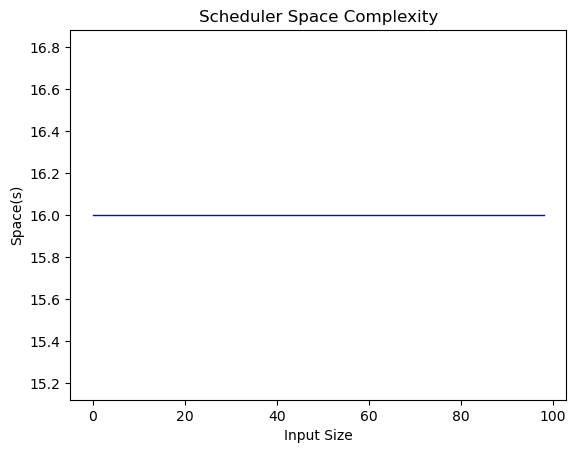

In [9]:
### runtime experiment
# code based on my PCW and the breakout room Workbook from CS110 Session 10 and the Problem Set 2 Assignment

space_greedy = []



num_tests = 500
lst_sizes = np.arange(1, 100, 1)

start_scheduler = 8*60

for lst_size in lst_sizes:
    # creating the list that will be used
    tasks = []
    types = ['Task', 'Explore', 'Study', "Routine"]
    
    for i in range(lst_size):
        task = Task(id = i, description= '', duration=random.randint(10, 180), 
                    type = random.choice(types), dependencies=[], time=random.randint(0, 16)*60)
        # print(task.id, task.duration, task.type)
        tasks.append(task)


    greedy_scheduler = TaskScheduler(tasks)
    
    
    size_greedy = 0
    blockPrint()
    # test loops -> it will create the runtime average of how long it takes to run the algorithm for arr
    for test in range(num_tests): 
        size_greedy += sys.getsizeof(greedy_scheduler.run_task_scheduler(start_scheduler))
    # average
    space_greedy.append(size_greedy/num_tests)
    
    
# plotting
plt.plot(space_greedy, color="blue",  linewidth=1.0)
# plt.plot(runtime_dp, color="purple",  linewidth=1.0)

# labels
plt.title('Scheduler Space Complexity')
plt.xlabel('Input Size')
plt.ylabel('Space(s)')

# show
plt.show()

In [10]:
### runtime experiment
# code based on my PCW and the breakout room Workbook from CS110 Session 10 and the Problem Set 2 Assignment

space_dp = []



num_tests = 500
lst_sizes = np.arange(1, 100, 1)

start_scheduler = 8*60

for lst_size in lst_sizes:
    
    # creating the list that will be used
    tasks = []
    types = ['Task', 'Explore', 'Study', "Routine"]
    
    for i in range(lst_size):
        task = Task(id = i, description= '', duration=random.randint(10, 180), 
                    type = random.choice(types), dependencies=[], time=random.randint(0, 16)*60)
        
        tasks.append(task)


    dp_scheduler = OptimalTasks(tasks)
    
    
    size_dp = 0
    
    # blocks prints form TaskScheduler
    blockPrint()
    # test loops -> it will create the runtime average of how long it takes to run the algorithm for arr
    for test in range(num_tests): 
        size_dp += sys.getsizeof(dp_scheduler.Order(start_scheduler))
    # average
    space_dp.append(size_dp/num_tests)
    
    
# plotting
plt.plot(space_dp, color="blue",  linewidth=1.0)
# plt.plot(runtime_dp, color="purple",  linewidth=1.0)

# labels
plt.title('Scheduler Space Complexity')
plt.xlabel('Input Size')
plt.ylabel('Space(s)')

# show
plt.show()

IndexError: list index out of range

## Runtime Experiment ##

In [12]:
### runtime experiment
# code based on my PCW and the breakout room Workbook from CS110 Session 10 and the Problem Set 2 Assignment
runtime_greedy = []
runtime_dp = []


num_tests = 500
lst_sizes = np.arange(1, 100, 1)

start_scheduler = 8*60

for lst_size in lst_sizes:
    # creating the list that will be used
    tasks = []
    types = ['Task', 'Explore', 'Study', "Routine"]
    
    for i in range(lst_size):
        task = Task(id = i, description= '', duration=random.randint(10, 180), 
                    type = random.choice(types), dependencies=[])
        print(task.id, task.duration, task.type)
        tasks.append(task)

    greedy_scheduler = TaskScheduler(tasks)
    
    ## ERROR HAPPENS HERE
    dp_scheduler = OptimalTasks(tasks)

    
    # used for calculating the runtime
    end_greedy = 0
    end_dp = 0
    
    # test loops -> it will create the runtime average of how long it takes to run the algorithm for arr
    for test in range(num_tests):
        start_greedy = time.process_time() 
        greedy_scheduler.run_task_scheduler(start_scheduler)
        final_greedy = time.process_time() - start_greedy
        end_greedy += final_greedy
    # average
    runtime_greedy.append(end_greedy/num_tests)
    
    
    for test in range(num_tests):
        start_dp = time.process_time() 
        dp_scheduler.Order(start_scheduler)
        final_dp = time.process_time() - start_dp
        end_dp += final_dp
    runtime_dp.append(end_dp/num_tests)




# plotting
plt.plot(runtime_greedy, color="blue",  linewidth=1.0)
# plt.plot(runtime_dp, color="purple",  linewidth=1.0)

# labels
plt.title('Scheduler Runtime')
plt.xlabel('Input Size')
plt.ylabel('Runtime(s)')

# show
plt.show()

IndexError: list index out of range

In [13]:
### runtime experiment
# code based on my PCW and the breakout room Workbook from CS110 Session 10 and the Problem Set 2 Assignment


runtime_greedy = []
runtime_dp = []


num_tests = 500
lst_sizes = np.arange(1, 100, 1)

start_scheduler = 8*60

for lst_size in lst_sizes:
    # creating the list that will be used
    tasks = []
    types = ['Task', 'Explore', 'Study', "Routine"]
    
    for i in range(lst_size):
        task = Task(id = i, description= '', 
                    duration=random.randint(10, 180), 
                    type = random.choice(types), dependencies=[], time=random.randint(0, 16)*60)
        # print(task.id, task.duration, task.type)
        tasks.append(task)


    greedy_scheduler = TaskScheduler(tasks)
    
    
    # used for calculating the runtime
    end_greedy = 0
    end_dp = 0
    
    blockPrint()
    # test loops -> it will create the runtime average of how long it takes to run the algorithm for arr
    for test in range(num_tests):
        start_greedy = time.process_time() 
        greedy_scheduler.run_task_scheduler(start_scheduler)
        final_greedy = time.process_time() - start_greedy
        end_greedy += final_greedy
    # average
    runtime_greedy.append(end_greedy/num_tests)

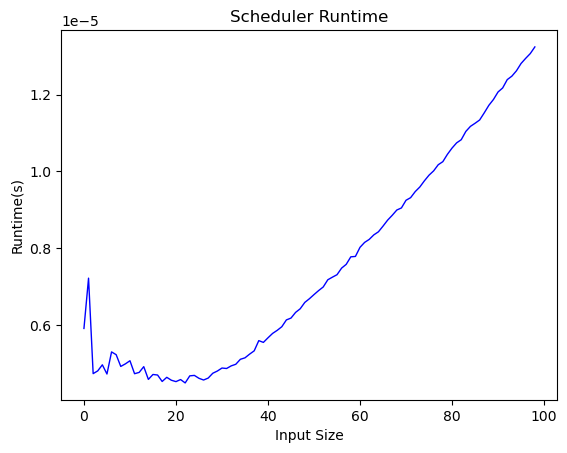

In [14]:
# plotting
plt.plot(runtime_greedy, color="blue",  linewidth=1.0)
#plt.plot(runtime, color="purple",  linewidth=1.0)
# plt.plot(runtime_dp, color="purple",  linewidth=1.0)

# labels
plt.title('Scheduler Runtime')
plt.xlabel('Input Size')
plt.ylabel('Runtime(s)')

# show
plt.show()